<a href="https://colab.research.google.com/github/rdthemis/ADTD/blob/main/Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
amostra = df.sample(n=50, random_state=42, replace=False)
amostra.shape

(50, 7)

In [2]:
from sklearn.model_selection import train_test_split

In [8]:
y = df['tip']
X = df.drop(columns=['tip'])

In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 244 entries, 0 to 243
Series name: tip
Non-Null Count  Dtype  
--------------  -----  
244 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   sex         244 non-null    category
 2   smoker      244 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 5.5 KB


In [9]:
extratos = df[['sex', 'smoker', 'day']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=extratos, random_state=42)

<Axes: xlabel='day', ylabel='count'>

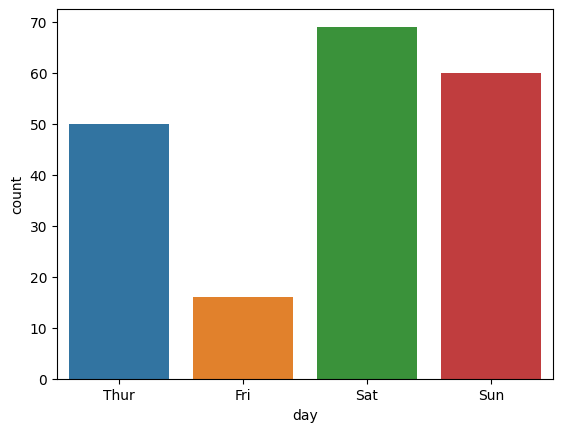

In [16]:
sns.countplot(data=X_train, x='day')

Probabilidade

In [17]:
espaco_amostral = len(df)

In [20]:
M_q_5 = df.loc[df['tip'] > 5]
evento = len(M_q_5)

In [23]:
probabilidade =evento / espaco_amostral
print("Qual a probalbilidade: ", probabilidade)

Qual a probalbilidade:  0.07377049180327869


In [24]:
count_smoker = len(df[df['smoker'] == 'Yes'])

In [25]:
probabilidade_conjunta = (count_smoker / espaco_amostral) * (evento / espaco_amostral)
probabilidade_conjunta

0.028117441547970974

Distribuição

In [26]:
import scipy.stats as stats
import numpy as np

<Axes: xlabel='total_bill', ylabel='Density'>

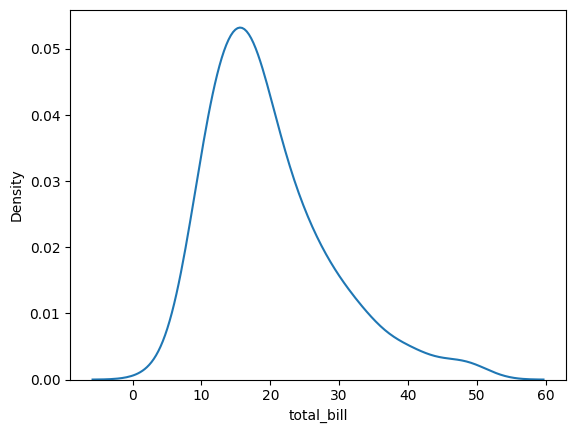

In [27]:
sns.kdeplot(df['total_bill'])

In [31]:
correlacao = df.corr()
correlacao

<ipython-input-31-ee2e201a8fee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

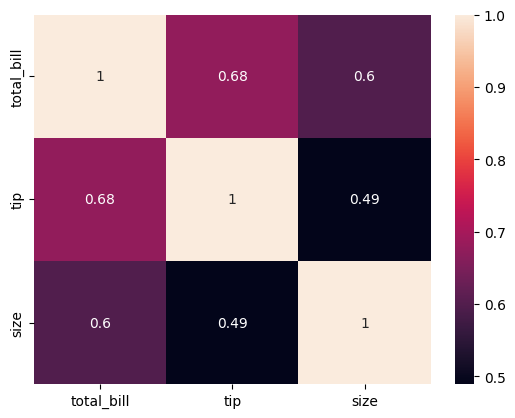

In [33]:
sns.heatmap(correlacao, annot=True)